# Week 7
## Bag of Words (BoW) & TF-IDF


In [4]:
import nltk

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('punkt')
nltk.download('reuters')
from nltk.corpus import stopwords, reuters
import matplotlib.pyplot as plt
import numpy as np


# Sample documents
documents = [
    "The quick brown fox jumps over the lazy dog. The dog is not amused by the fox.",
    "Foxes are clever animals, they are known to be quick and agile. The brown fox quickly runs away from the chasing hounds.",
    "Dogs are loyal companions and they love to play. The lazy dog refuses to chase the fast fox, preferring to lie down instead.",
    "The quick brown fox is often seen in the forest, running swiftly through the trees. The dog, on the other hand, barks loudly at the fox but never catches it.",
    "Foxes and dogs have a long history in fables. The sly fox always outsmarts the lazy dog."
]


# Tokenized sample data
tokenized_sent = [nltk.word_tokenize(doc.lower()) for doc in documents]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sumin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\sumin\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


<div class="alert alert-block alert-info">
<b>Step 1: Download Required Resources</b><br> Importing Libraries and sample data </div>
 </color=blue> 

In [8]:
tokenized_sent

[['the',
  'quick',
  'brown',
  'fox',
  'jumps',
  'over',
  'the',
  'lazy',
  'dog',
  '.',
  'the',
  'dog',
  'is',
  'not',
  'amused',
  'by',
  'the',
  'fox',
  '.'],
 ['foxes',
  'are',
  'clever',
  'animals',
  ',',
  'they',
  'are',
  'known',
  'to',
  'be',
  'quick',
  'and',
  'agile',
  '.',
  'the',
  'brown',
  'fox',
  'quickly',
  'runs',
  'away',
  'from',
  'the',
  'chasing',
  'hounds',
  '.'],
 ['dogs',
  'are',
  'loyal',
  'companions',
  'and',
  'they',
  'love',
  'to',
  'play',
  '.',
  'the',
  'lazy',
  'dog',
  'refuses',
  'to',
  'chase',
  'the',
  'fast',
  'fox',
  ',',
  'preferring',
  'to',
  'lie',
  'down',
  'instead',
  '.'],
 ['the',
  'quick',
  'brown',
  'fox',
  'is',
  'often',
  'seen',
  'in',
  'the',
  'forest',
  ',',
  'running',
  'swiftly',
  'through',
  'the',
  'trees',
  '.',
  'the',
  'dog',
  ',',
  'on',
  'the',
  'other',
  'hand',
  ',',
  'barks',
  'loudly',
  'at',
  'the',
  'fox',
  'but',
  'never',
  'c

<div class="alert alert-block alert-info">
<b>Step 2: Initialize CountVectorizer </b><br> Use CountVectorizer for BoW model </div>
 </color=blue> 

In [16]:
vectorizer = CountVectorizer(stop_words=stopwords.words('English'))

In [18]:
vectorizer

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [19]:
X = vectorizer.fit_transform(documents) # makes it into a matrix

In [20]:
print(X) #capital letter X <-> Y

  (0, 36)	1
  (0, 6)	1
  (0, 17)	2
  (0, 23)	1
  (0, 25)	1
  (0, 12)	2
  (0, 2)	1
  (1, 36)	1
  (1, 6)	1
  (1, 17)	1
  (1, 18)	1
  (1, 10)	1
  (1, 3)	1
  (1, 24)	1
  (1, 0)	1
  (1, 37)	1
  (1, 40)	1
  (1, 4)	1
  (1, 9)	1
  (1, 21)	1
  (2, 17)	1
  (2, 25)	1
  (2, 12)	1
  (2, 13)	1
  (2, 30)	1
  :	:
  (3, 6)	1
  (3, 17)	2
  (3, 12)	1
  (3, 32)	1
  (3, 41)	1
  (3, 16)	1
  (3, 39)	1
  (3, 43)	1
  (3, 44)	1
  (3, 19)	1
  (3, 5)	1
  (3, 28)	1
  (3, 31)	1
  (3, 7)	1
  (4, 17)	1
  (4, 25)	1
  (4, 12)	1
  (4, 18)	1
  (4, 13)	1
  (4, 27)	1
  (4, 20)	1
  (4, 14)	1
  (4, 42)	1
  (4, 1)	1
  (4, 33)	1


In [24]:
bow_matrix = X.toarray()
print(bow_matrix)

vocab = vectorizer.get_feature_names_out()
print(vocab) # print out the features (the vocabulary)

[[0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  1 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1
  0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
  1 0 0 1 0 1 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 1 0 0]]
['agile' 'always' 'amused' 'animals' 'away' 'barks' 'brown' 'catches'
 'chase' 'chasing' 'clever' 'companions' 'dog' 'dogs' 'fables' 'fast'
 'forest' 'fox' 'foxes' 'hand' 'history' 'hounds' 'instead' 'jumps'
 'known' 'lazy' 'lie' 'long' 'loudly' 'love' 'loyal' 'never' 'often'
 'outsmarts' 'play' 'preferring' 'quick' 'quickly' 'refuses' 'running'
 'runs' 'seen' 'sly' 'swiftly' 'trees']


[[0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  1 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1
  0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
  1 0 0 1 0 1 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 1 0 0]]


<div class="alert alert-block alert-info">
<b>Step 3: Visualization</b><br>Visualizing Word Frequency in BoW </div>
 </color=blue> 

In [25]:
word_sum = np.sum(bow_matrix, axis=0) # creates a list of summation of the value for each column
print(word_sum) 

[1 1 1 1 1 1 3 1 1 1 1 1 5 2 1 1 1 7 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1]


**Explanation on np.sum above** <br>
Document 1: [1, 2, 0]  # Word1: 1 occurrence, Word2: 2 occurrences, Word3: 0 occurrences <br>
Document 2: [0, 1, 3]  # Word1: 0 occurrences, Word2: 1 occurrence, Word3: 3 occurrences <br>
Document 3: [4, 0, 1]  # Word1: 4 occurrences, Word2: 0 occurrences, Word3: 1 occurrence <br>
Word1 Total: 1 + 0 + 4 = 5 <br>
Word2 Total: 2 + 1 + 0 = 3 <br>
Word3 Total: 0 + 3 + 1 = 4 <br>

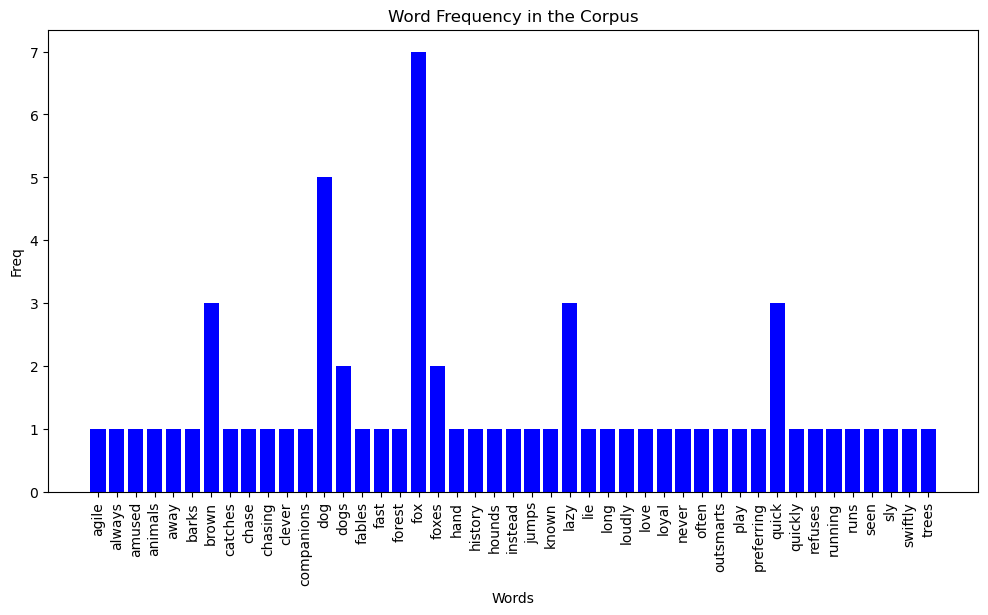

In [30]:
plt.figure(figsize=(12,6))
plt.bar(vocab, word_sum, color='blue')
plt.xlabel('Words')
plt.ylabel('Freq')
plt.title('Word Frequency in the Corpus')
plt.xticks(rotation=90)
plt.show()

# Try this out with a large corpus data!

<div class="alert alert-block alert-info">
<b>TF-IDF</b><br>Step-by-Step Guide to Create TF-IDF Mode </div>
 </color=blue> 

In [32]:
import pandas as pd
num_documents = len(reuters.fileids())
num_documents #10000 articles provided by nltk

10788

In [36]:
documents = [reuters.raw(doc_id) for doc_id in reuters.fileids()][:10]
#raw()?

In [37]:
documents

['ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said they would 

<div class="alert alert-block alert-info">
<b>Step 1. Prepare the Data for TF-IDF Vectorization</b><br>Remove any stopwords, and normalize the case to make the TF-IDF model more accurate. </div>
 </color=blue> 

In [38]:
stop_words = list(set(stopwords.words('english'))) # list() creates a list
stop_words

['does',
 'those',
 'couldn',
 'theirs',
 'that',
 'after',
 'nor',
 'doing',
 'here',
 'doesn',
 'where',
 'can',
 'then',
 "shouldn't",
 'under',
 "you've",
 "mightn't",
 "you're",
 'aren',
 'same',
 'won',
 'isn',
 'being',
 'your',
 'this',
 'so',
 'me',
 'its',
 "won't",
 'why',
 'above',
 'he',
 'before',
 'when',
 'yourselves',
 'through',
 "didn't",
 'mustn',
 "you'd",
 'o',
 'ourselves',
 'other',
 'during',
 'am',
 "hasn't",
 "mustn't",
 'by',
 'than',
 'the',
 'themselves',
 'a',
 'while',
 'an',
 'we',
 'such',
 'no',
 'what',
 'each',
 "wouldn't",
 "hadn't",
 'with',
 'all',
 "wasn't",
 'wouldn',
 'myself',
 'further',
 'or',
 'how',
 'below',
 'wasn',
 't',
 "isn't",
 'her',
 'yourself',
 'ours',
 'and',
 'are',
 'both',
 'of',
 'was',
 'will',
 'any',
 'more',
 'just',
 'ma',
 'needn',
 'shouldn',
 'my',
 'for',
 'but',
 'again',
 "she's",
 'y',
 "shan't",
 'too',
 'whom',
 'about',
 'once',
 'i',
 'against',
 'be',
 "that'll",
 'itself',
 'out',
 'she',
 'very',
 'few',

<div class="alert alert-block alert-info">
<b>Step 2. TF-IDF vectorizer</b><br>Initialize TF-IDF Vectorizer, fit and transform, and extract feature names</div>
 </color=blue> 

In [39]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_vectorizer

TfidfVectorizer(stop_words=['does', 'those', 'couldn', 'theirs', 'that',
                            'after', 'nor', 'doing', 'here', 'doesn', 'where',
                            'can', 'then', "shouldn't", 'under', "you've",
                            "mightn't", "you're", 'aren', 'same', 'won', 'isn',
                            'being', 'your', 'this', 'so', 'me', 'its', "won't",
                            'why', ...])

In [40]:
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [41]:
tfidf_matrix

<10x922 sparse matrix of type '<class 'numpy.float64'>'
	with 1203 stored elements in Compressed Sparse Row format>

In [43]:
vocab = tfidf_vectorizer.get_feature_names_out()
vocab

array(['000', '10', '12', '15', '17', '18', '184', '19', '1985', '1986',
       '1987', '1988', '20', '2000', '21', '21st', '23', '25', '26', '27',
       '29', '30', '300', '31', '332', '35', '381', '40', '44', '45',
       '450', '468', '50', '500', '52', '53', '530', '550', '56', '57',
       '575', '58', '595', '60', '600', '64', '65', '66', '750', '87',
       '89', '905', '95', 'able', 'absorbing', 'according', 'accounting',
       'act', 'action', 'added', 'additives', 'adelaide', 'advantage',
       'affected', 'agency', 'aggressive', 'ago', 'agreed', 'agriculture',
       'ahead', 'ailing', 'aims', 'alleged', 'allow', 'allowed',
       'already', 'also', 'although', 'altogether', 'american', 'among',
       'amounted', 'analyst', 'analysts', 'annual', 'appear', 'approval',
       'approved', 'april', 'arbitration', 'area', 'argue', 'around',
       'article', 'asia', 'asian', 'asked', 'association', 'august',
       'australia', 'australian', 'avowed', 'awaiting', 'aware', 'ba

In [44]:
print(tfidf_matrix)

  (0, 282)	0.029288065056686814
  (0, 274)	0.029288065056686814
  (0, 894)	0.025623596041013486
  (0, 890)	0.03445284405364029
  (0, 514)	0.029288065056686814
  (0, 264)	0.029288065056686814
  (0, 532)	0.029288065056686814
  (0, 415)	0.025623596041013486
  (0, 443)	0.03445284405364029
  (0, 494)	0.03445284405364029
  (0, 762)	0.03445284405364029
  (0, 523)	0.03445284405364029
  (0, 688)	0.03445284405364029
  (0, 239)	0.06890568810728058
  (0, 643)	0.03445284405364029
  (0, 675)	0.03445284405364029
  (0, 328)	0.029288065056686814
  (0, 101)	0.03445284405364029
  (0, 548)	0.03445284405364029
  (0, 917)	0.03445284405364029
  (0, 633)	0.03445284405364029
  (0, 241)	0.025623596041013486
  (0, 785)	0.03445284405364029
  (0, 511)	0.03445284405364029
  (0, 280)	0.03445284405364029
  :	:
  (9, 664)	0.05393405997000455
  (9, 297)	0.04718592924620908
  (9, 607)	0.05108861324162
  (9, 450)	0.026967029985002274
  (9, 76)	0.03767497317538765
  (9, 82)	0.05393405997000455
  (9, 835)	0.070778893869313

<div class="alert alert-block alert-info">
<b>Step 3. Convert the TF-IDF matrix</b><br>TF-IDF matrix to a DataFrame </div>
 </color=blue> 

In [48]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vocab)
tfidf_df

,000,10,12,15,17,18,184,19,1985,1986,...,world,worried,worth,would,wrong,yasuhiro,year,years,yen,yesterday
0,0.000000,0.034453,0.000000,0.034453,0.034453,0.000000,0.000000,0.000000,0.025624,0.000000,...,0.051247,0.034453,0.000000,0.076871,0.000000,0.034453,0.073981,0.000000,0.000000,0.029288
1,0.000000,0.000000,0.176837,0.000000,0.000000,0.000000,0.000000,0.104011,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055836,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075232,0.000000,0.059566,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.077409,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083110,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063313,0.072368,...,0.063313,0.000000,0.000000,0.063313,0.000000,0.000000,0.045700,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062864
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046121,0.000000,0.068604,0.117622,...,0.034302,0.000000,0.046121,0.068604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.201357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054047,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.026967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.031723,0.000000,0.000000,0.095168,0.026967,0.000000


<div class="alert alert-block alert-info">
<b>Step 4. Check TF-IDF scores</b><br>Select one document and check!</div>
 </color=blue> 

In [54]:
document_index = 1

tfidf_score = tfidf_df.iloc[document_index] # pandas Series
top_10_words = tfidf_score.nlargest(10) #pandas Series function
print(top_10_words)

china           0.416043
pct             0.223343
daily           0.208021
paper           0.208021
preservation    0.208021
stocks          0.208021
storage         0.208021
vermin          0.208021
waste           0.208021
12              0.176837
Name: 1, dtype: float64


<div class="alert alert-block alert-info">
<b>Step 5.Visualization</b><br>Plot a bar graph for the top 10 words</div>
 </color=blue> 

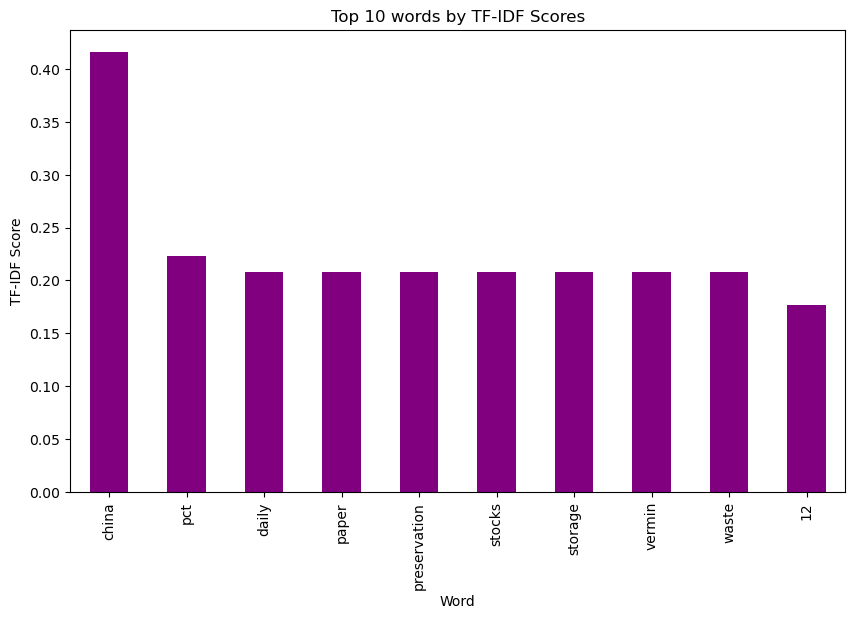

In [58]:
plt.figure(figsize=(10,6))
top_10_words.plot(kind='bar', color='purple')
plt.xlabel('Word')
plt.ylabel('TF-IDF Score')
plt.title('Top 10 words by TF-IDF Scores')
plt.xticks(rotation=90)
plt.show()

In [59]:
top_10_words

china           0.416043
pct             0.223343
daily           0.208021
paper           0.208021
preservation    0.208021
stocks          0.208021
storage         0.208021
vermin          0.208021
waste           0.208021
12              0.176837
Name: 1, dtype: float64

# Present from me: Entire code (a nice and clean one) for your future usages!

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The Reuters corpus contains 10788 documents.
Example document categories: ['acq', 'alum', 'barley', 'bop', 'carcass']
Example document fileids: ['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']
Example document raw content:
ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict wo


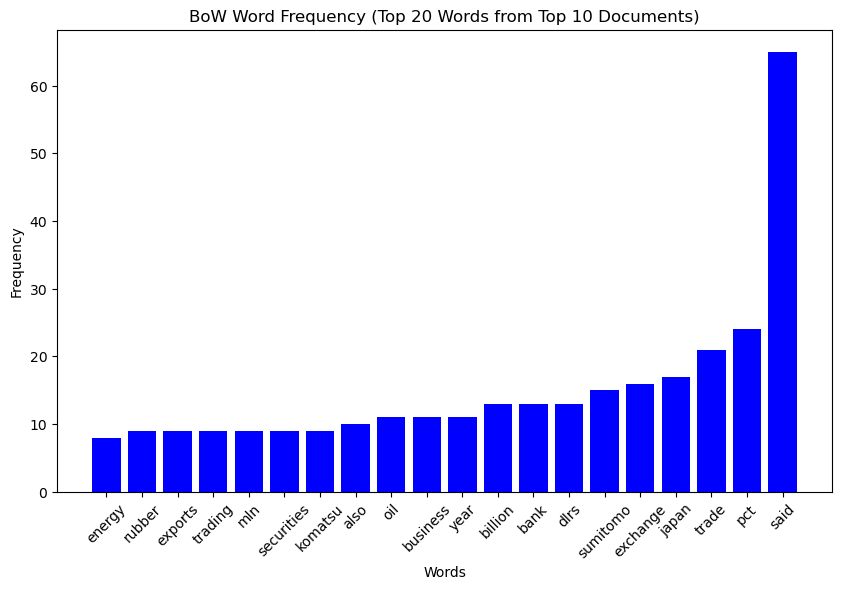

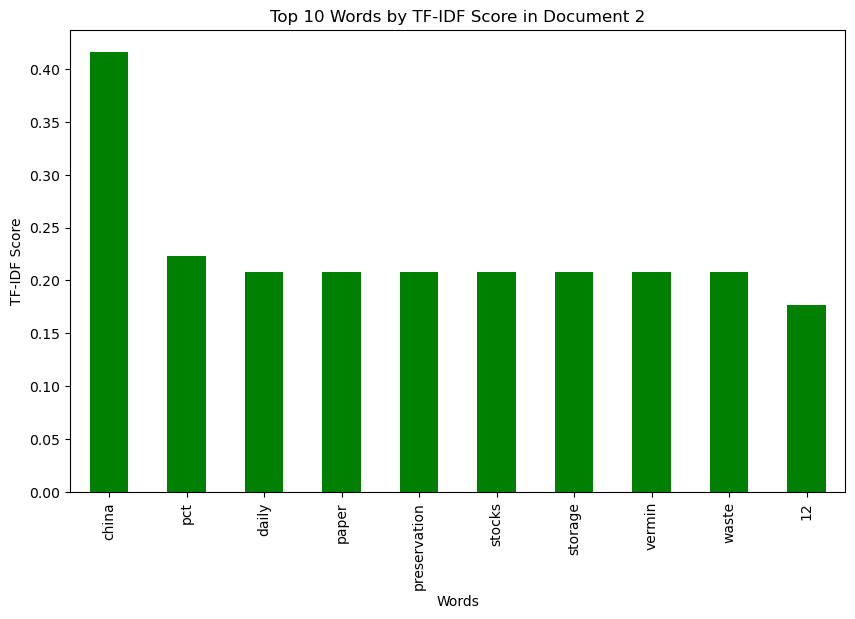

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import reuters, stopwords

# Step 1: Download the Reuters dataset and stopwords
nltk.download('reuters')
nltk.download('stopwords')

# Step 2: Load Reuters corpus
documents = [reuters.raw(doc_id) for doc_id in reuters.fileids()]

# Step 3: Define stop words
stop_words = list(stopwords.words('english'))  # Convert the set to a list

# Step 4: Bag of Words (BoW) Model
def create_bow_model(documents):
    vectorizer = CountVectorizer(stop_words=stop_words, lowercase=True)
    bow_matrix = vectorizer.fit_transform(documents)
    vocab = vectorizer.get_feature_names_out()

    # Sum the word frequencies across all documents
    word_sum = np.asarray(bow_matrix.sum(axis=0)).flatten()

    # Convert sparse matrix to DataFrame for better readability
    bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vocab)
    return bow_df, vocab, word_sum

# Step 5: Visualize BoW Model
def plot_word_frequency(vocab, word_sum, title="Word Frequency in the Corpus"):
    sorted_indices = np.argsort(word_sum)[-20:]  # Top 20 words
    top_vocab = [vocab[i] for i in sorted_indices]
    top_word_sum = word_sum[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(top_vocab, top_word_sum, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Step 6: TF-IDF Model
def create_tfidf_model(documents):
    tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, lowercase=True)
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
    vocab = tfidf_vectorizer.get_feature_names_out()
    
    # Convert the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vocab)
    return tfidf_df, vocab

# Step 7: Visualize TF-IDF Scores for a Specific Document
def plot_top_n_words(tfidf_df, document_index, vocab, top_n=10):
    tfidf_scores = tfidf_df.iloc[document_index]
    top_words = tfidf_scores.nlargest(top_n)
    
    plt.figure(figsize=(10, 6))
    top_words.plot(kind='bar', color='green')
    plt.title(f'Top {top_n} Words by TF-IDF Score in Document {document_index+1}')
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.show()

# Step 8: Explore Reuters Corpus (Optional Step, for testing :P)
def explore_reuters_corpus():
    print(f"The Reuters corpus contains {len(reuters.fileids())} documents.")
    print(f"Example document categories: {reuters.categories()[:5]}")
    print(f"Example document fileids: {reuters.fileids()[:5]}")
    print(f"Example document raw content:\n{reuters.raw(reuters.fileids()[0])[:500]}")

# Run corpus exploration (optional)
explore_reuters_corpus()

# Create and visualize the Bag of Words model
bow_df, vocab_bow, word_sum_bow = create_bow_model(documents[:10])  # Using 10 documents for demonstration
plot_word_frequency(vocab_bow, word_sum_bow, "BoW Word Frequency (Top 20 Words from Top 10 Documents)")

# Create and visualize the TF-IDF model
tfidf_df, vocab_tfidf = create_tfidf_model(documents[:10])  # Using 10 documents for demonstration
plot_top_n_words(tfidf_df, document_index=1, vocab=vocab_tfidf, top_n=10)

Phew! Done again